In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Project: Analysis of Men's Professional Tennis Match Results
---


## Introduction

The purpose of this projec is to gain experience in performing data wrangling, data visualization and introductory data analysis using Python with suitable libraries. Begin developing skills in formulating a problem from data in a given domain, asking questions of the data, and extracting insights from a real-world dataset. <br>
The dataset chosen for this project is ATP Mens Professional Tennis Match Result, covering from year 2013 to year 2022.

#### Datasets Metadata:
Please refer to the Appendix at the end of this document.

#### Dataset Souce: http://tennis-data.co.uk/alldata.php

## Task 1: Wrangling, reshaping, EDA 

### 1.1 Collect data covering 10 years (2013 - 2022) from the above website. Read each excel dataset using Python and combine into a single dataset.

In [2]:
# Import libraries
import pandas as pd
import os
import numpy as np
import missingno as msno
from pylab import rcParams
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter("ignore")
import seaborn as sns

In [3]:
master_df = pd.DataFrame()

In [4]:
for file in os.listdir(os.getcwd()):
    if file.endswith('.xlsx'):
        master_df = pd.concat([master_df,pd.read_excel(file)])
master_df.to_csv('Master File.csv', index =False)

In [5]:
data = pd.read_csv('Master File.csv',low_memory=False)

### 1.2 Check that all the data has been read. Check that all the data in the combined dataset is in order based on the ‘Date’. <br>
* Checked, all data is in order based on Date, see head & tail - It looks right to me.

In [6]:
data.head()

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,Loser,WRank,...,EXW,EXL,LBW,LBL,PSW,PSL,SJW,SJL,MaxW,MaxL,AvgW,AvgL
0,1,Brisbane,Brisbane International,2012-12-31,ATP250,Outdoor,Hard,1st Round,3.0,Mayer F.,Giraldo S.,28.0,...,1.45,2.65,1.44,2.62,1.47,2.85,1.44,2.63,1.47,3.20,1.42,2.78
1,1,Brisbane,Brisbane International,2012-12-31,ATP250,Outdoor,Hard,1st Round,3.0,Nieminen J.,Benneteau J.,41.0,...,1.75,2.00,1.80,1.91,1.80,2.10,1.73,2.00,1.80,2.26,1.73,2.05
2,1,Brisbane,Brisbane International,2012-12-31,ATP250,Outdoor,Hard,1st Round,3.0,Nishikori K.,Matosevic M.,19.0,...,1.25,3.75,1.29,3.50,1.30,3.85,1.30,3.20,1.30,4.20,1.28,3.58
3,1,Brisbane,Brisbane International,2012-12-31,ATP250,Outdoor,Hard,1st Round,3.0,Baghdatis M.,Mitchell B.,36.0,...,1.06,8.00,1.08,7.00,1.08,9.43,1.07,7.00,1.10,9.50,1.08,7.76
4,1,Brisbane,Brisbane International,2013-01-01,ATP250,Outdoor,Hard,1st Round,3.0,Istomin D.,Klizan M.,43.0,...,1.87,1.87,1.91,1.80,1.88,2.00,1.91,1.80,2.05,2.00,1.88,1.85


In [7]:
data.tail()

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,Loser,WRank,...,EXW,EXL,LBW,LBL,PSW,PSL,SJW,SJL,MaxW,MaxL,AvgW,AvgL
24750,68,Turin,Masters Cup,2022-11-18,Masters Cup,Indoor,Hard,Round Robin,NaN,Djokovic N.,Medvedev D.,8.0,...,NaN,NaN,NaN,NaN,1.37,3.36,NaN,NaN,1.39,3.55,1.34,3.25
24751,68,Turin,Masters Cup,2022-11-18,Masters Cup,Indoor,Hard,Round Robin,NaN,Rublev A.,Tsitsipas S.,7.0,...,NaN,NaN,NaN,NaN,2.63,1.55,NaN,NaN,2.63,1.63,2.39,1.57
24752,68,Turin,Masters Cup,2022-11-19,Masters Cup,Indoor,Hard,Semifinals,NaN,Djokovic N.,Fritz T.,8.0,...,NaN,NaN,NaN,NaN,1.24,4.53,NaN,NaN,1.28,4.75,1.23,4.14
24753,68,Turin,Masters Cup,2022-11-19,Masters Cup,Indoor,Hard,Semifinals,NaN,Ruud C.,Rublev A.,4.0,...,NaN,NaN,NaN,NaN,2.35,1.67,NaN,NaN,2.35,1.75,2.18,1.69
24754,68,Turin,Masters Cup,2022-11-20,Masters Cup,Indoor,Hard,The Final,NaN,Djokovic N.,Ruud C.,8.0,...,NaN,NaN,NaN,NaN,1.22,4.90,NaN,NaN,1.29,4.90,1.23,4.21


### 1.3 What other data-checking operations could you perform to make sure that the data is ready for analysis? Use various approaches to perform sanity checking on the data, including some plotting.

* 1.3.1  First, check if there is any missing values <br>
There appeared to be missing values across the dataset, I am going to leave it as if I imputed it wrong and I may mess up the whole data set.

In [8]:
data.isna().sum()

ATP               0
Location          0
Tournament        0
Date              0
Series            0
              ...  
SJL           19659
MaxW             17
MaxL             17
AvgW             17
AvgL             17
Length: 42, dtype: int64

* 1.3.2 Check if there are duplicates in the dataset <br>  
Result showing no duplicates. It's good.

In [9]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
24750    False
24751    False
24752    False
24753    False
24754    False
Length: 24755, dtype: bool

In [10]:
data.duplicated().sum()

0

* 1.3.3 Plot bar chart for visualizing the missing value.<br>
And from the plot I can quickly identify W5 & L5 , W4 & L4 are the top 2 sets columns that having missing values.<br>
It make sense to me because most of matches finish at winning 2 sets

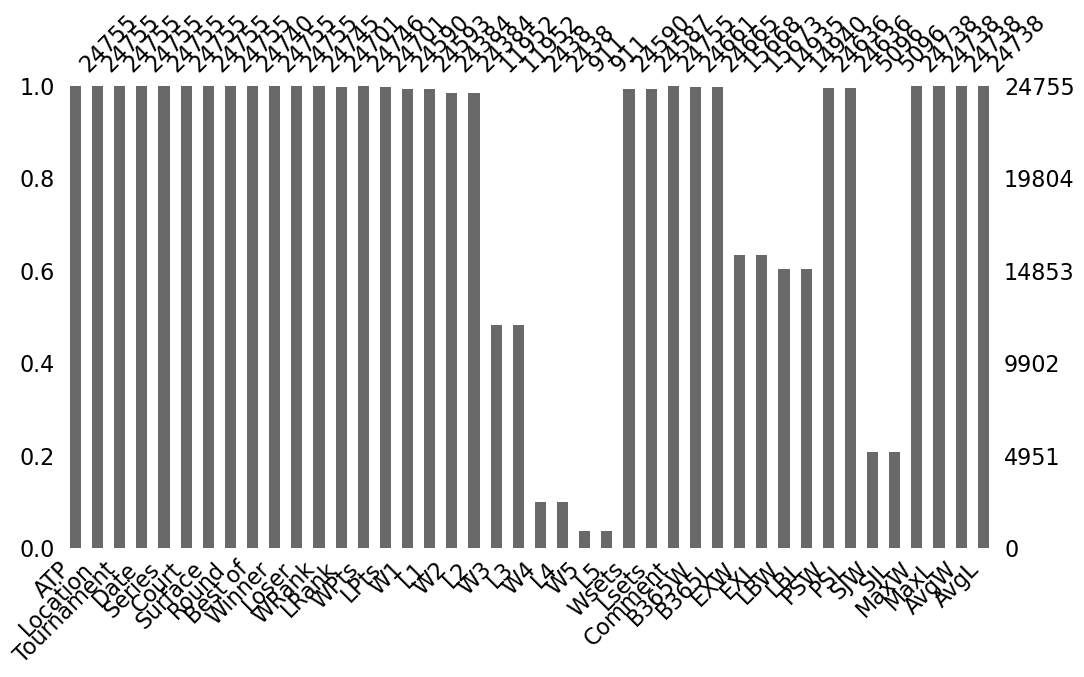

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))
_ = msno.bar(data, ax=ax)

* 1.3.4 Plot heatmaps to visualize relationship<br>
There are variables that are highly correlated.

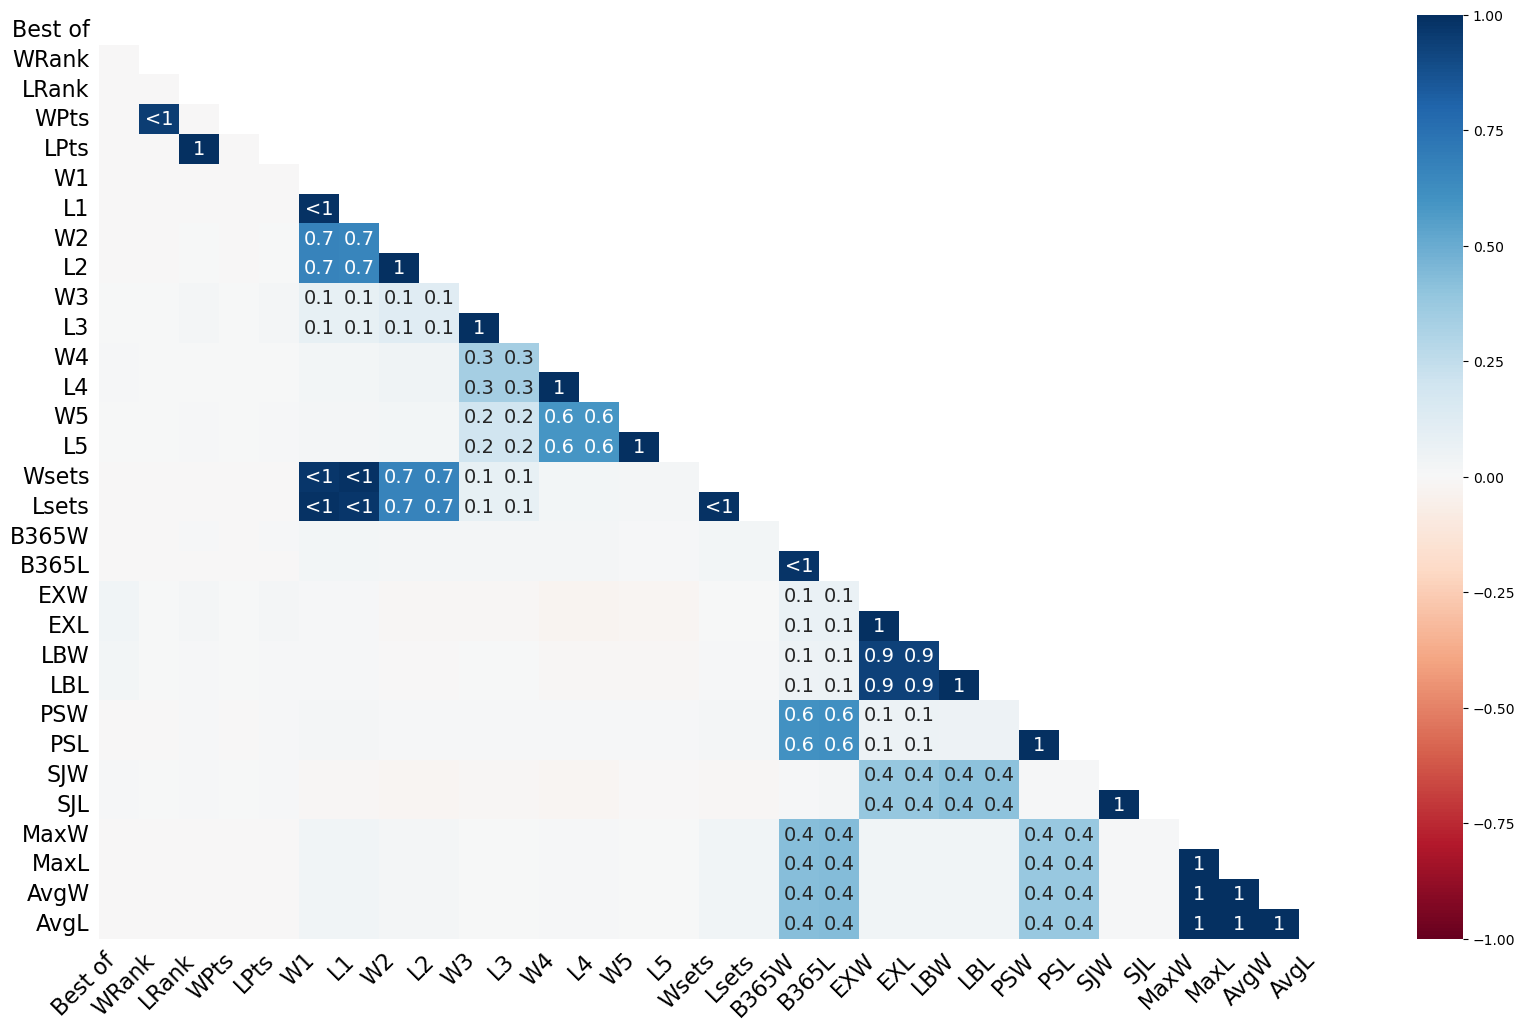

In [15]:
_ = msno.heatmap(data)

* 1.3.5 Delete rows that are in 2012<br> 
I noticed there are rows fall outside 2013-2022 range, so I decided to delete these rows in 2012 then continue analysis.<br>
From below output I can see there are 76 rows been deleted, which matches what I found in master csv files.

In [16]:
tennis = data[data.Date <'2013-01-01']
tennis.index
data.drop(tennis.index, inplace=True)
data

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,Loser,WRank,...,EXW,EXL,LBW,LBL,PSW,PSL,SJW,SJL,MaxW,MaxL,AvgW,AvgL
4,1,Brisbane,Brisbane International,2013-01-01,ATP250,Outdoor,Hard,1st Round,3.0,Istomin D.,Klizan M.,43.0,...,1.87,1.87,1.91,1.80,1.88,2.00,1.91,1.80,2.05,2.00,1.88,1.85
5,1,Brisbane,Brisbane International,2013-01-01,ATP250,Outdoor,Hard,1st Round,3.0,Millman J.,Ito T.,199.0,...,1.75,2.00,1.73,2.00,1.70,2.27,1.80,1.91,1.85,2.28,1.71,2.08
6,1,Brisbane,Brisbane International,2013-01-01,ATP250,Outdoor,Hard,1st Round,3.0,Falla A.,Levine J.,54.0,...,2.08,1.67,1.91,1.80,2.26,1.70,2.00,1.73,2.32,1.83,2.08,1.70
7,1,Brisbane,Brisbane International,2013-01-01,ATP250,Outdoor,Hard,1st Round,3.0,Melzer J.,Kudla D.,29.0,...,1.55,2.35,1.44,2.62,1.60,2.47,1.50,2.50,1.63,2.82,1.52,2.46
8,1,Brisbane,Brisbane International,2013-01-01,ATP250,Outdoor,Hard,1st Round,3.0,Robredo T.,Harrison R.,114.0,...,2.5,1.50,2.38,1.53,2.93,1.45,2.50,1.50,3.25,1.53,2.66,1.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24750,68,Turin,Masters Cup,2022-11-18,Masters Cup,Indoor,Hard,Round Robin,NaN,Djokovic N.,Medvedev D.,8.0,...,NaN,NaN,NaN,NaN,1.37,3.36,NaN,NaN,1.39,3.55,1.34,3.25
24751,68,Turin,Masters Cup,2022-11-18,Masters Cup,Indoor,Hard,Round Robin,NaN,Rublev A.,Tsitsipas S.,7.0,...,NaN,NaN,NaN,NaN,2.63,1.55,NaN,NaN,2.63,1.63,2.39,1.57
24752,68,Turin,Masters Cup,2022-11-19,Masters Cup,Indoor,Hard,Semifinals,NaN,Djokovic N.,Fritz T.,8.0,...,NaN,NaN,NaN,NaN,1.24,4.53,NaN,NaN,1.28,4.75,1.23,4.14
24753,68,Turin,Masters Cup,2022-11-19,Masters Cup,Indoor,Hard,Semifinals,NaN,Ruud C.,Rublev A.,4.0,...,NaN,NaN,NaN,NaN,2.35,1.67,NaN,NaN,2.35,1.75,2.18,1.69


### 1.4 Create a new column that is based on the ‘ATP’ column. The ‘ATP’ column is an integer value which represents a sequence/ordering of all the tournaments in a given year. Call the new column ‘OverallSequence’ which represents the order of all the tournaments from 2013 to 2022.

ATP column has index 111,222,...until 68 for year 2013, and continue with 111,222...68 for year 2014.<br>
I noticed overlap rows in the end of 2013 and beginning of 2014, like at 31/12/2013 the ATP already being 222, at 1/01/2014 ATP is 444 <br>
In this case, I decided to go with index based on 'ATP' and year and ignore the overlap rows, just continue push the numbers in 2014 to be 69,70,going on.<br>

In [17]:
data['Year'] = pd.DatetimeIndex(data['Date']).year
data.loc[data['Year'] == 2013, 'OverallSequence'] = data['ATP'] + (data.groupby('ATP').cumcount() // 4)
data.loc[data['Year'] > 2013, 'OverallSequence'] = data['ATP'] + ((data['Year'] - 2013) * 68) + (data.groupby('ATP').cumcount() // 4)
data['OverallSequence'] = data['OverallSequence'].astype(int)
data


,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,Loser,WRank,...,LBW,LBL,PSW,PSL,SJW,SJL,MaxW,MaxL,AvgW,AvgL,Year,OverallSequence
4,1,Brisbane,Brisbane International,2013-01-01,ATP250,Outdoor,Hard,1st Round,3.0,Istomin D.,Klizan M.,43.0,...,1.91,1.80,1.88,2.00,1.91,1.80,2.05,2.00,1.88,1.85,2013,1
5,1,Brisbane,Brisbane International,2013-01-01,ATP250,Outdoor,Hard,1st Round,3.0,Millman J.,Ito T.,199.0,...,1.73,2.00,1.70,2.27,1.80,1.91,1.85,2.28,1.71,2.08,2013,1
6,1,Brisbane,Brisbane International,2013-01-01,ATP250,Outdoor,Hard,1st Round,3.0,Falla A.,Levine J.,54.0,...,1.91,1.80,2.26,1.70,2.00,1.73,2.32,1.83,2.08,1.70,2013,1
7,1,Brisbane,Brisbane International,2013-01-01,ATP250,Outdoor,Hard,1st Round,3.0,Melzer J.,Kudla D.,29.0,...,1.44,2.62,1.60,2.47,1.50,2.50,1.63,2.82,1.52,2.46,2013,1
8,1,Brisbane,Brisbane International,2013-01-01,ATP250,Outdoor,Hard,1st Round,3.0,Robredo T.,Harrison R.,114.0,...,2.38,1.53,2.93,1.45,2.50,1.50,3.25,1.53,2.66,1.47,2013,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24750,68,Turin,Masters Cup,2022-11-18,Masters Cup,Indoor,Hard,Round Robin,NaN,Djokovic N.,Medvedev D.,8.0,...,NaN,NaN,1.37,3.36,NaN,NaN,1.39,3.55,1.34,3.25,2022,682
24751,68,Turin,Masters Cup,2022-11-18,Masters Cup,Indoor,Hard,Round Robin,NaN,Rublev A.,Tsitsipas S.,7.0,...,NaN,NaN,2.63,1.55,NaN,NaN,2.63,1.63,2.39,1.57,2022,682
24752,68,Turin,Masters Cup,2022-11-19,Masters Cup,Indoor,Hard,Semifinals,NaN,Djokovic N.,Fritz T.,8.0,...,NaN,NaN,1.24,4.53,NaN,NaN,1.28,4.75,1.23,4.14,2022,683
24753,68,Turin,Masters Cup,2022-11-19,Masters Cup,Indoor,Hard,Semifinals,NaN,Ruud C.,Rublev A.,4.0,...,NaN,NaN,2.35,1.67,NaN,NaN,2.35,1.75,2.18,1.69,2022,683


### 1.5 Create EDA 10 visualisations of the dataset and explain each one. 

Quick show descriptive statistics to get a feel of the data

In [18]:
data.describe()

,ATP,Best of,WRank,LRank,WPts,LPts,W1,L1,W2,L2,W3,L3,...,LBW,LBL,PSW,PSL,SJW,SJL,MaxW,MaxL,AvgW,AvgL,Year,OverallSequence
count,24679.000000,24664.000000,24669.000000,24625.000000,24670.000000,24625.000000,24515.000000,24518.000000,24310.000000,24310.000000,11928.000000,11928.000000,...,14860.000000,14865.000000,24561.000000,24561.000000,5022.000000,5022.000000,24662.000000,24662.000000,24662.000000,24662.000000,24679.000000,24679.000000
mean,32.125086,3.400908,57.640115,87.068751,1969.235509,1177.470782,5.807383,4.141896,5.785479,3.981366,6.040828,3.686201,...,1.832863,3.448383,1.933312,3.867959,1.830834,3.563403,2.001344,7.600008,1.858953,3.424681,2017.356943,383.712914
std,18.138041,0.800697,68.850916,107.395316,2340.222420,1291.313115,1.229125,1.825519,1.244186,1.852722,0.927448,1.762794,...,1.084400,3.112172,1.304063,4.346138,1.063796,2.976220,1.466952,381.472749,1.476008,3.017173,2.879462,227.026652
min,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.010000,0.972000,1.010000,1.010000,1.010000,1.010000,1.010000,1.010000,1.010000,2013.000000,1.000000
25%,18.000000,3.000000,17.000000,34.000000,725.000000,577.000000,6.000000,3.000000,6.000000,3.000000,6.000000,2.000000,...,1.250000,1.730000,1.290000,1.780000,1.220000,1.730000,1.310000,1.830000,1.260000,1.730000,2015.000000,194.000000
50%,32.000000,3.000000,42.000000,63.000000,1091.500000,830.000000,6.000000,4.000000,6.000000,4.000000,6.000000,4.000000,...,1.500000,2.500000,1.570000,2.590000,1.500000,2.630000,1.610000,2.680000,1.530000,2.480000,2017.000000,377.000000
75%,48.000000,3.000000,76.000000,101.000000,2100.000000,1268.000000,6.000000,6.000000,6.000000,6.000000,6.000000,5.000000,...,2.100000,4.000000,2.160000,4.050000,2.100000,4.000000,2.250000,4.250000,2.100000,3.780000,2020.000000,559.000000
max,68.000000,5.000000,1821.000000,2159.000000,16950.000000,16950.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,26.000000,41.000000,46.000000,81.000000,17.000000,26.000000,61.000000,42586.000000,161.000000,34.460000,2022.000000,866.000000


* 1.5.1 Explore ATP Entry Points of Match Winner feature, and generating the distributions by Series label.<br>
Based on output, I can see Masters Cup has the highest mean value of entry points. And the Masters Cup is the only boxplot that there are no ourliers<br>
It make sense to me as ATP Masters Cup is most high level competition in men's tennis.

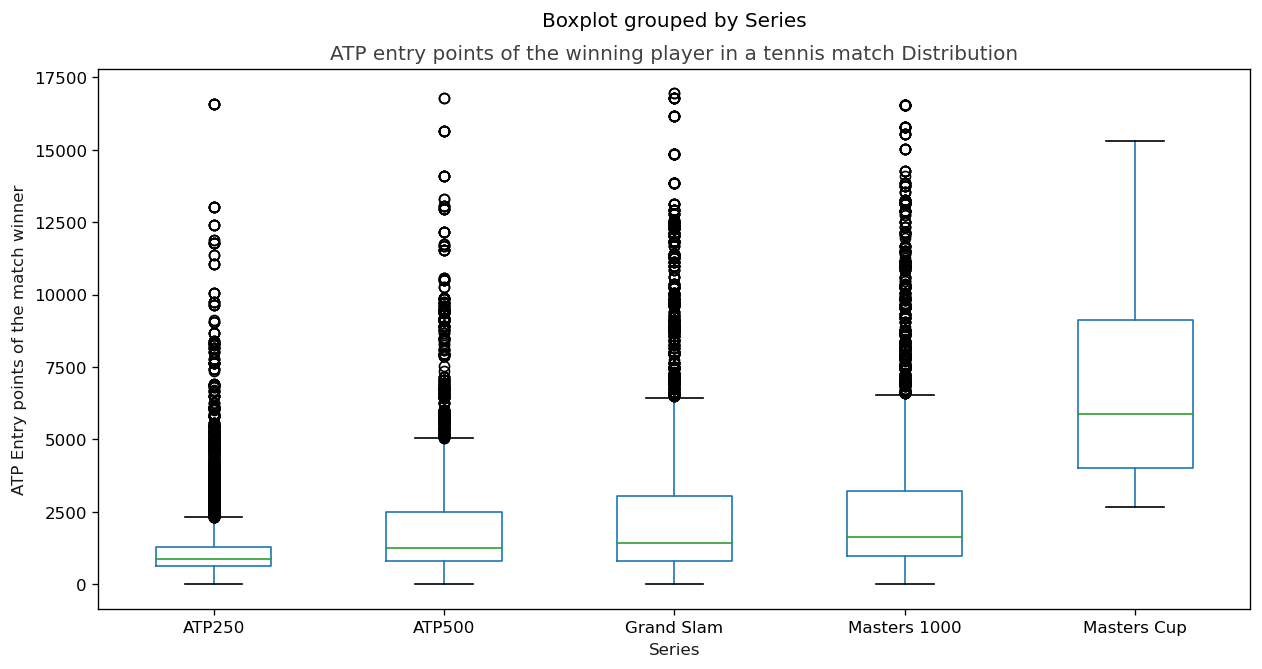

In [19]:
rcParams['figure.dpi'] = 120
data[['Series','WPts']].boxplot(by='Series',grid=False)
plt.title('ATP entry points of the winning player in a tennis match Distribution' , alpha=0.75, fontsize=12)
plt.ylabel('ATP Entry points of the match winner', alpha=0.9)
plt.xlabel('Series', alpha=0.9)
plt.show()

* 1.5.2 Explore the relationship between the comments of a tennis match and the ATP entry points of the winning player. Also to see the distribution of ATP entry points varies across different Series.<br>
From graph I can see only Grand Slam has matches are scheduled & disqualified, this may indicate some data entry issue.<br>
Also Rrtired is a typo in comment seciton. I am going to leave these for now.

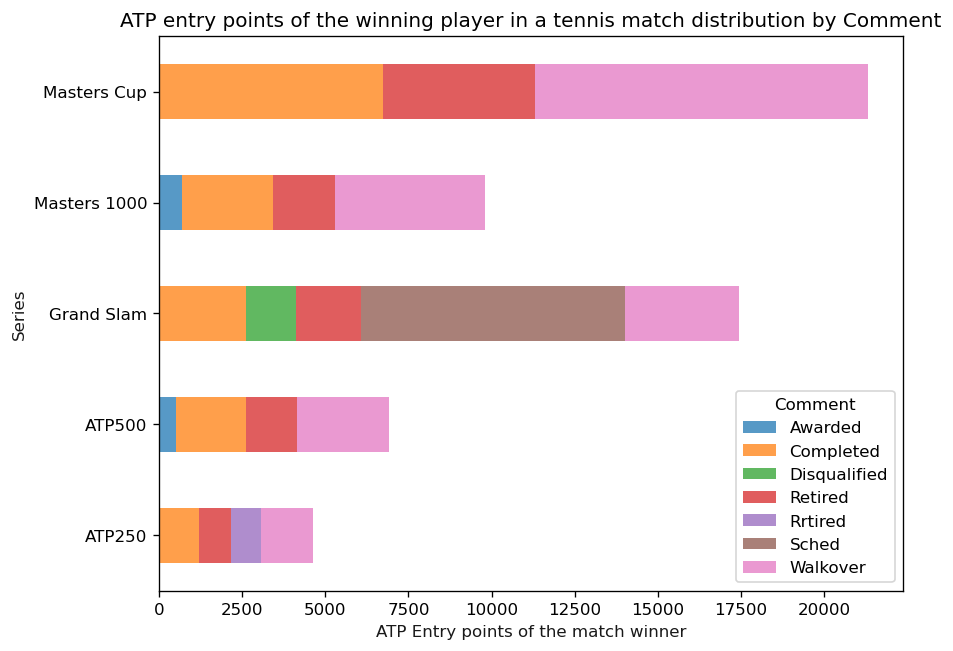

In [16]:
rcParams['figure.dpi'] = 120
grouped_data = data.groupby(['Series', 'Comment'])['WPts'].mean().unstack()
ax = grouped_data.plot(kind='barh', stacked=True, alpha=0.75,figsize=(8, 6))
ax.set_xlabel('ATP Entry points of the match winner',alpha=0.9)
ax.set_ylabel('Series', alpha=0.9)
ax.set_title('ATP entry points of the winning player in a tennis match distribution by Comment')
plt.show()

* 1.5.3 Explore the tennis series - How many different series in this dataset and how their distribution looks like.<br>
Graph make sense to be as only top players can actaully entry the Masters Cup, so it very less showing in graph.

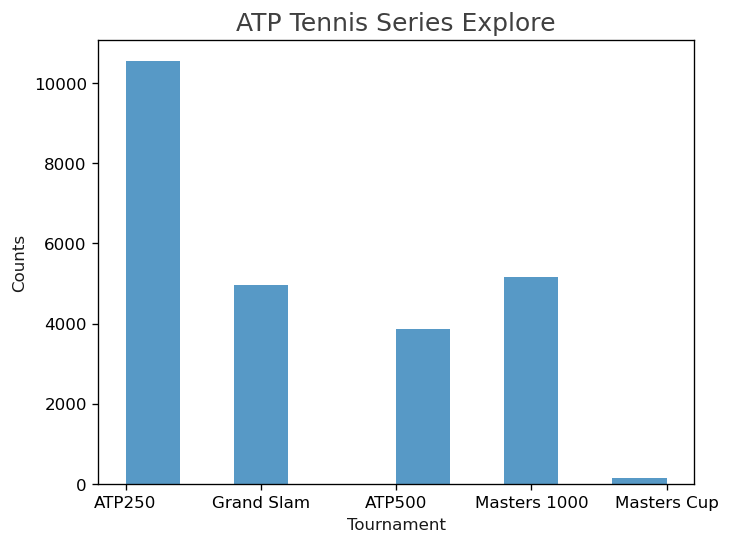

In [17]:
rcParams['figure.dpi'] = 120
at = data.Series.hist(alpha = 0.75)
plt.title('ATP Tennis Series Explore', alpha=0.75, fontsize=15)
plt.ylabel('Counts', alpha=0.9)
plt.xlabel('Tournament', alpha=0.9)   
plt.grid(False)

* 1.5.4 Explore top 10 cities held the most of the Matches

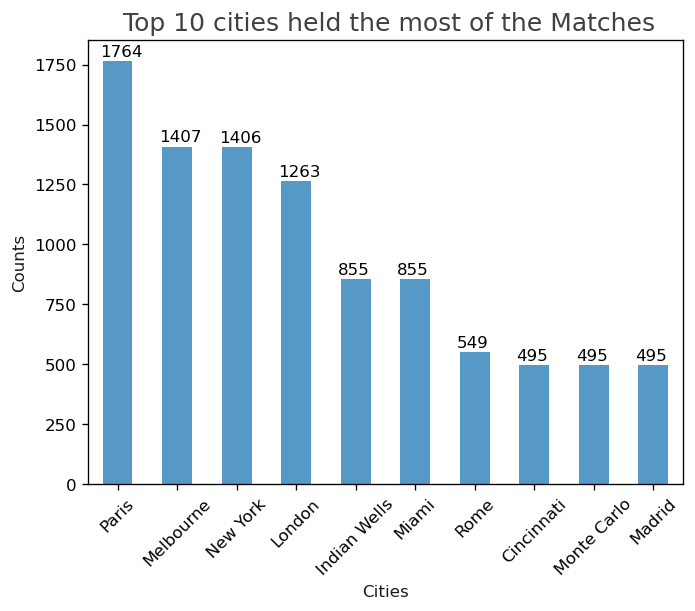

In [18]:
rcParams['figure.dpi'] = 120
ax = data.Location.value_counts().head(10).plot(kind='bar',rot=45,alpha=0.75)
for i, v in enumerate(data.Location.value_counts().head(10)):
    ax.text(i-0.3, v + 22, str(v))
plt.title(' Top 10 cities held the most of the Matches', alpha=0.75, fontsize=15)
plt.ylabel('Counts', alpha=0.9)
plt.xlabel('Cities', alpha=0.9)   
plt.show()

* 1.5.5 Explore winner rank in mastercup based on the different round they are.<br>
From the graph I can see the the distribution of "WRank" values among winners participating in the Masters Cup, and how this distribution varies by round of the tournament.<br>
The top rank palyers(green) has appears more in final round. 

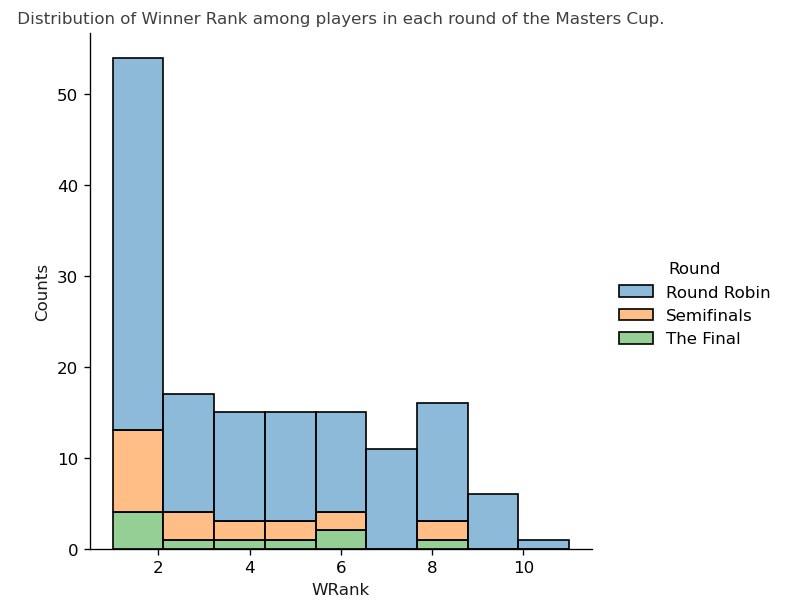

In [19]:
rcParams['figure.dpi'] = 120
mastercup = data[['WRank','Surface','Series','Round']][data['Series']=="Masters Cup"]
sns.displot(mastercup, x="WRank", hue="Round", multiple="stack", alpha =0.5)
plt.title(' Distribution of Winner Rank among players in each round of the Masters Cup. ', alpha=0.75, fontsize=10)
plt.ylabel('Counts', alpha=0.9)
plt.xlabel('WRank', alpha=0.9)   
plt.show()

* 1.5.6 Based on 1.5.5 variables, have a look at kde plot<br>
I noticed is kde x-asix is having negative value for rank in the tails of the distribution. <br>


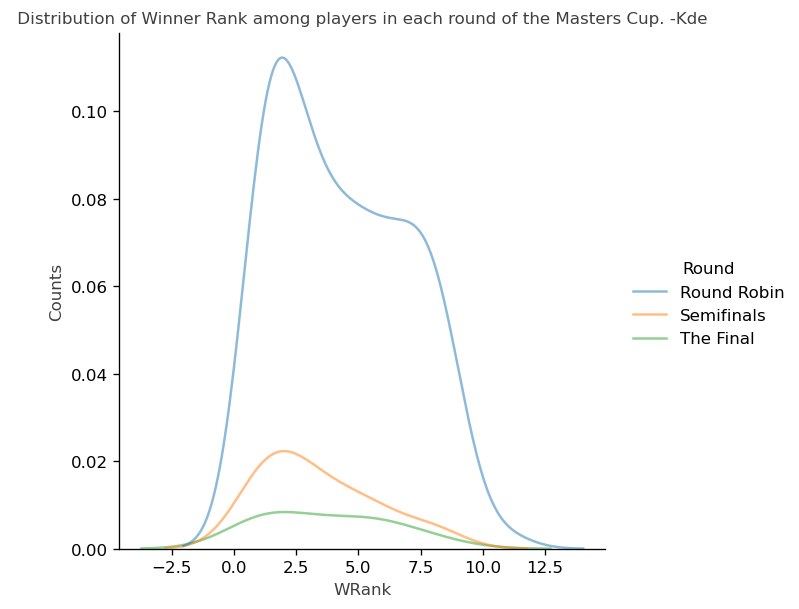

In [20]:
rcParams['figure.dpi'] = 120
mastercup = data[['WRank','Surface','Series','Round']][data['Series']=="Masters Cup"]
sns.displot(mastercup, x="WRank", hue="Round", kind="kde", alpha =0.5)
plt.title(' Distribution of Winner Rank among players in each round of the Masters Cup. -Kde ', alpha=0.75, fontsize=10)
plt.ylabel('Counts', alpha=0.75)
plt.xlabel('WRank', alpha=0.75)   
plt.show()

* 1.5.7 Explore the relationship between "WRank" and "MaxW" for each combination of "Surface" and "Court" in the dataset <br>
From graph I can see most hard surfce court is indoor, and obviously grass surface are all outdoor. Clay surfure are more at outdoor court.<br>
I can also see there is extreme outlier in grass surface match for maximum odds of the match winner who ranks over 125. Other maximum bet odds seems fairly clustered in the normal range.

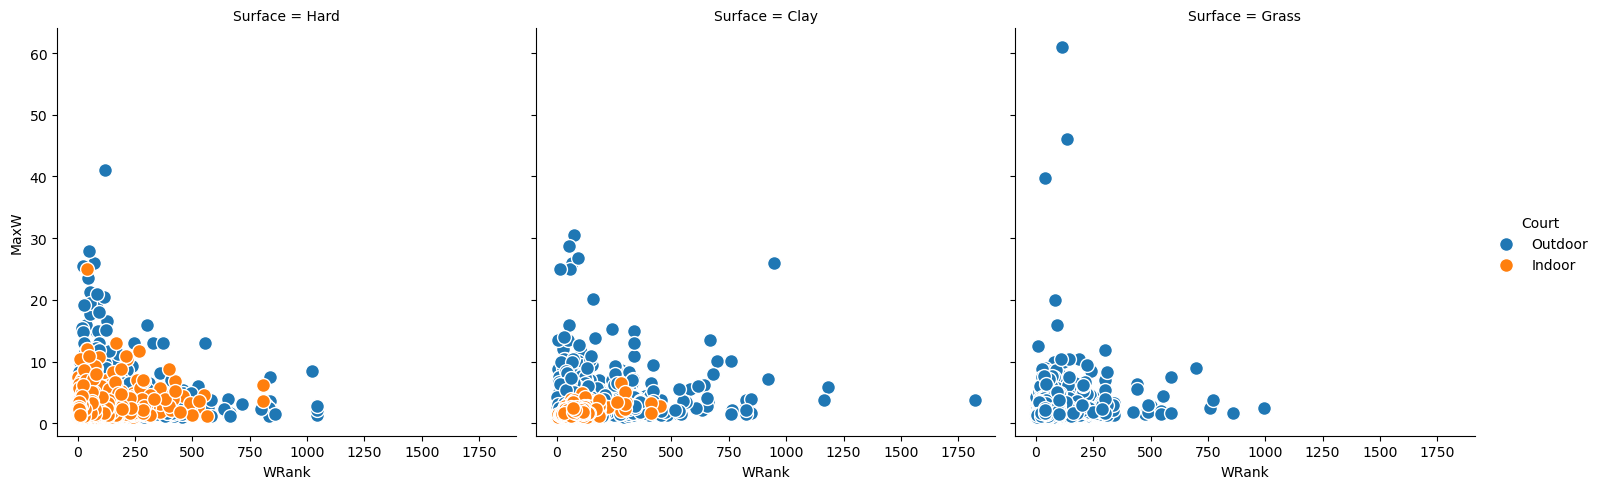

In [72]:
g = sns.FacetGrid(data, col="Surface",  hue="Court", height=5)
g.map(plt.scatter, "WRank", "MaxW", s=100, edgecolor="w").add_legend()
plt.show()

* 1.5.8 Explore betting data -  data scatter matrix<br>
To see if there are some relationship between variables.

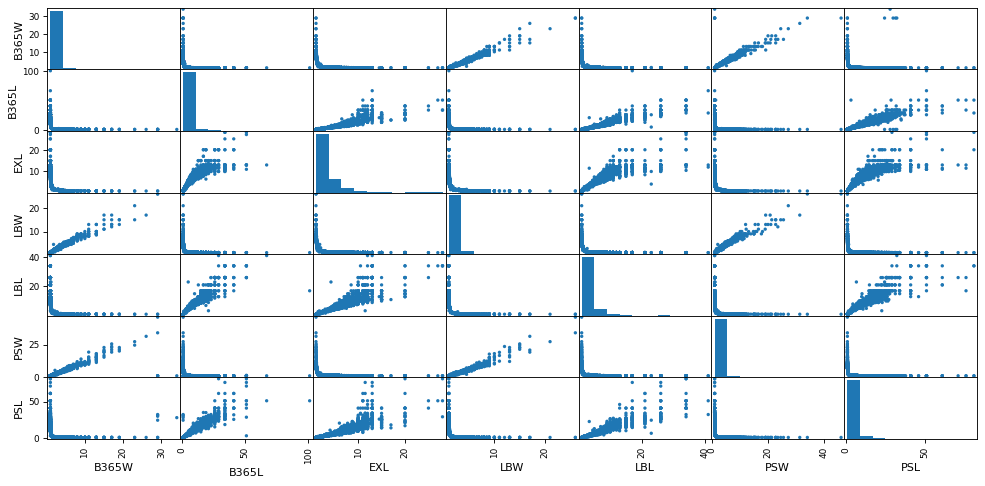

In [22]:
rcParams['figure.dpi'] = 80
_ = pd.plotting.scatter_matrix(data[data.columns[28:36]], alpha=1, figsize=(15,7),diagonal='hist')


* 1.5.9 From above scatter matrix, I can see LBW has posive relationship to PSW.<br>
Plot to show relationships.

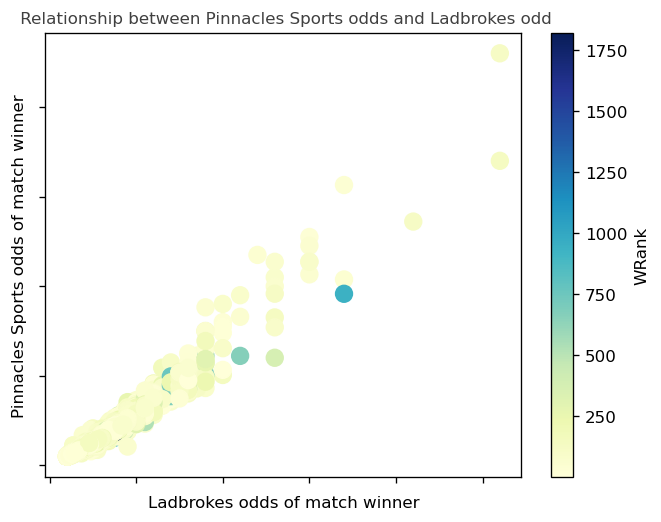

In [23]:
rcParams['figure.dpi'] = 120
data.plot(kind='scatter', x='LBW', y='PSW', c='WRank', s=100 ,cmap='YlGnBu');
plt.title(' Relationship between Pinnacles Sports odds and Ladbrokes odd', alpha=0.75, fontsize=10)
plt.ylabel('Pinnacles Sports odds of match winner')
plt.xlabel('Ladbrokes odds of match winner')
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), alpha=0.5)
plt.gca().set_yticklabels(plt.gca().get_yticklabels(), alpha=0.5)
plt.show()

* 1.5.10 Explore relationship between PSW & B365W<br>
From the graph, I can see positive relationship and data clustered at the left bottom conor

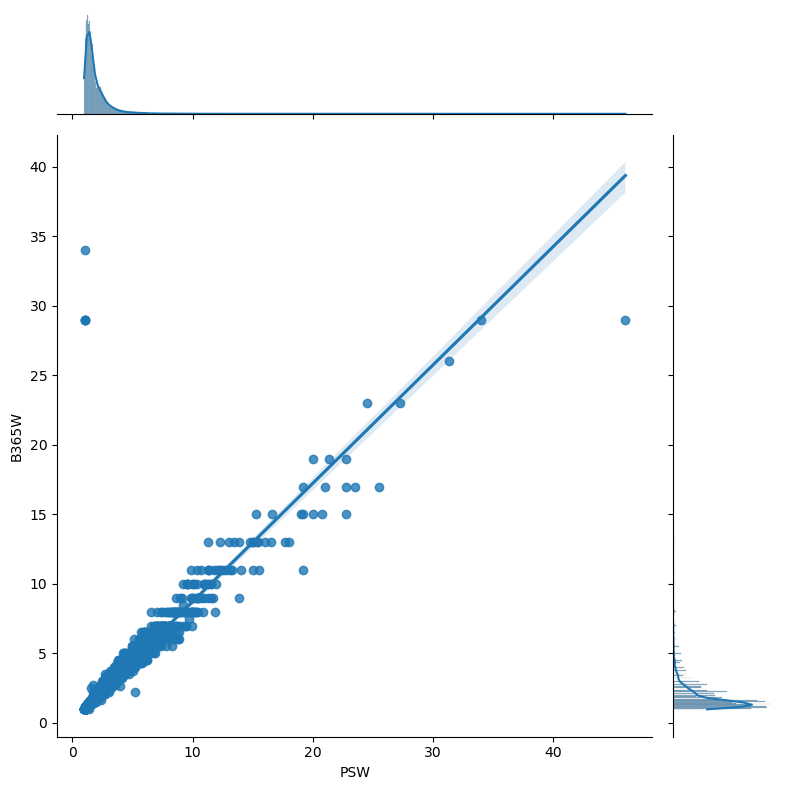

In [73]:
import scipy.stats as stats
rcParams['figure.dpi'] = 100
j = sns.jointplot("PSW", "B365W", data, kind='reg', height=8);

## Task 2: Analysis questions and plotting 

### 2.1 Who are the top 10 players by total wins in the dataset, and how many wins do they have? 

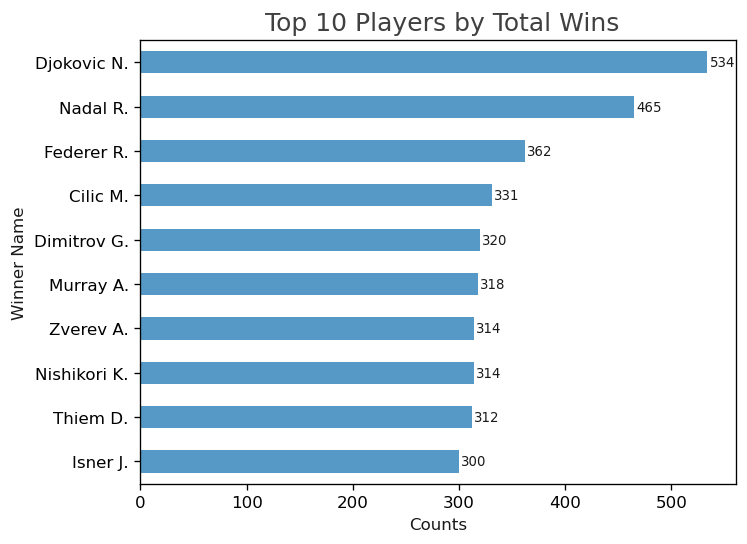

In [25]:
rcParams['figure.dpi'] = 120
ax = data.Winner.value_counts().head(10).sort_values(ascending=True).plot(kind='barh', alpha = 0.75)
for i, v in enumerate(data.Winner.value_counts().head(10).sort_values(ascending=True)):
    ax.text(v+2 , i, str(v), ha='left', va='center', fontsize=8,alpha =0.9)
plt.title(' Top 10 Players by Total Wins', alpha=0.75, fontsize=15)
plt.ylabel('Winner Name', alpha=0.9)
plt.xlabel('Counts', alpha=0.9)   
plt.show()

### 2.2 Which players have won the most Grand Slam matches and titles in the last 10 years? 
I have decided to show top 5 players who won the most Grand Slam matches and titles in the last 10 years

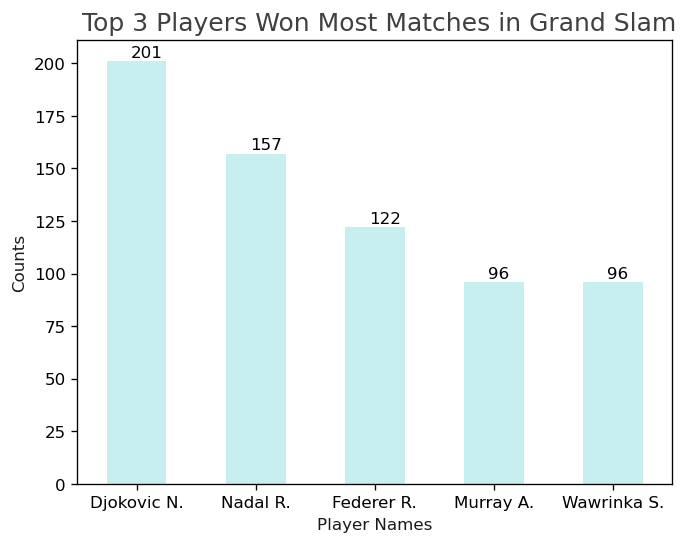

In [26]:
rcParams['figure.dpi'] = 120
grandslam = data[['Series','Winner']][data['Series']=="Grand Slam"]
ax = grandslam.Winner.value_counts().head(5).plot(kind='bar',rot=0, color="#B5EAEA", alpha = 0.75)
for i, v in enumerate(grandslam.Winner.value_counts().head(5)):
    ax.text(i-0.05 , v+2 , str(v))
plt.title(' Top 3 Players Won Most Matches in Grand Slam', alpha=0.75, fontsize=15)
plt.ylabel('Counts', alpha=0.9)
plt.xlabel('Player Names', alpha=0.9)    
plt.show()

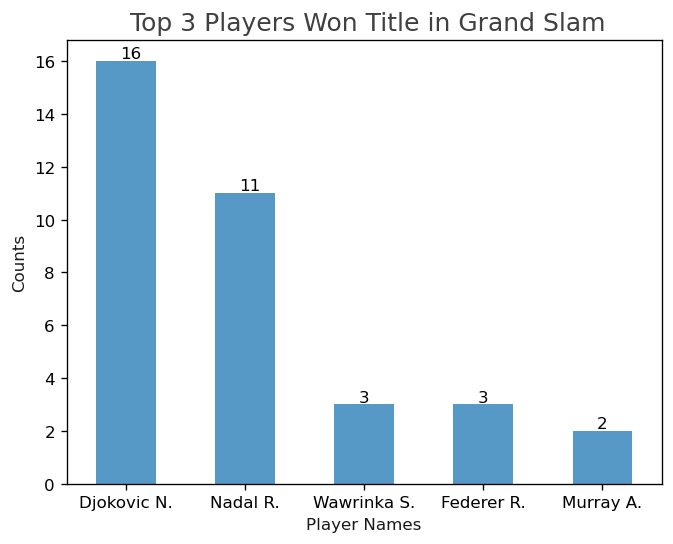

In [27]:
rcParams['figure.dpi'] = 120
grandtitle = data[['Series','Round','Winner']][(data['Round']=="The Final") & (data['Series']=="Grand Slam")]
ax = grandtitle.Winner.value_counts().head(5).plot(kind='bar',rot=0, alpha = 0.75)
for i, v in enumerate(grandtitle.Winner.value_counts().head(5)):
    ax.text(i-0.05 , v+0.1 , str(v))
plt.title(' Top 3 Players Won Title in Grand Slam', alpha=0.75, fontsize=15)
plt.ylabel('Counts', alpha=0.9)
plt.xlabel('Player Names', alpha=0.9)
plt.show()

### 2.3  Who are the top 10 players according to the largest number of First Round tournament losses across all 10 years? 

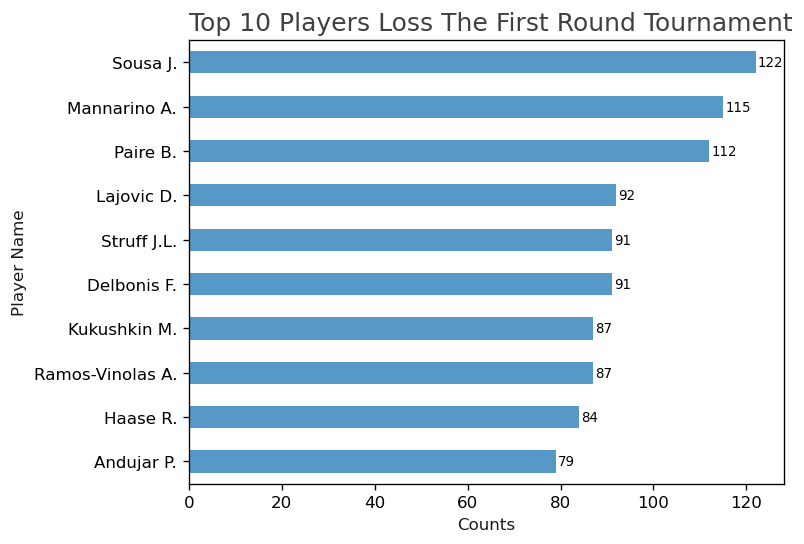

In [28]:
rcParams['figure.dpi'] = 120
roundlost = data[['Round','Loser']][data['Round']=="1st Round" ]
ax = roundlost.Loser.value_counts().head(10).sort_values(ascending=True).plot(kind='barh', alpha=0.75)
for i, v in enumerate(roundlost.Loser.value_counts().head(10).sort_values(ascending=True)):
    ax.text(v+0.5, i, str(v), ha='left', va='center', fontsize=8)
plt.title(' Top 10 Players Loss The First Round Tournament', alpha=0.75, fontsize=15)
plt.ylabel('Player Name', alpha=0.9)
plt.xlabel('Counts', alpha=0.9)    
plt.show()

### 2.4 Identify the 5 biggest upsets for each year in the dataset based on ranking differentials. List player names, rankings, winner/loser, score, and tournament name and what the difference in the rankings was at the time.

In [31]:
data['Upsets'] = data['WRank'] - data['LRank']
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
biggest_upset = data.groupby('Year').apply(lambda x: x.nlargest(5, 'Upsets'))
biggest_upset[["Tournament","Winner","Loser","WRank","LRank","WPts","LPts","Upsets","Year","Date"]]

Tournament          Winner  \
Year                                                              
2013 2441                           Kremlin Cup    Khachanov K.   
     295                               VTR Open        Garin C.   
     2428                           Kremlin Cup    Khachanov K.   
     1222                           French Open       Cuevas P.   
     36                            Chennai Open    Devvarman S.   
2014 4417    Crédit Agricole Suisse Open Gstaad      Troicki V.   
     3565                   Open Banco Sabadell    Cervantes I.   
     4434    Crédit Agricole Suisse Open Gstaad      Troicki V.   
     3547                   Open Banco Sabadell    Cervantes I.   
     4297                          Mercedes Cup    Davydenko P.   
2015 6936                   Claro Open Colombia    Demoliner M.   
     6766                             Wimbledon         Haas T.   
     6714                            AEGON Open        Fritz T.   
     7050                      bet-at-home Open        Munar J.   
     6945                   Claro Open Colombia        Gomez A.   
2016 8320                     Delray Beach Open  Del Potro J.M.   
     8308                     Delray Beach Open  Del Potro J.M.   
     8390                      Abierto Mexicano     Tursunov D.   
     8316                     Delray Beach Open  Del Potro J.M.   
     9786                     BB&T Atlanta Open       Opelka R.   
2017 11849                           Ricoh Open   Kokkinakis T.   
     11319                 Grand Prix Hassan II       Ahouda A.   
     11932                  AEGON Championships   Kokkinakis T.   
     11288  U.S. Men's Clay Court Championships         Haas T.   
     11359                  Monte Carlo Masters         Haas T.   
2018 13617                             Rio Open      Andujar P.   
     15019                            Citi Open       Murray A.   
     14999                            Citi Open       Murray A.   
     15035                            Citi Open       Murray A.   
     13962                 Grand Prix Hassan II       Ouahab L.   
2019 18054                           China Open       Murray A.   
     18061                           China Open       Murray A.   
     17519                   Suisse Open Gstaad      Stebe C.M.   
     17494                   Suisse Open Gstaad      Stebe C.M.   
     17517                   Suisse Open Gstaad      Stebe C.M.   
2020 19434                        European Open        Bergs Z.   
     18805                             Rio Open      Alcaraz C.   
     19600                           Sofia Open     Forejtek J.   
     19012                              US Open         Sock J.   
     18742                    Delray Beach Open     Harrison R.   
2021 19930                         Cordoba Open        Jarry N.   
     20230                           Miami Open           Lu Y.   
     21644                              US Open       Svajda Z.   
     19704                Great Ocean Road Open       Sweeny D.   
     20667                          Geneva Open       Cazaux A.   
2022 22414                     Maharashtra Open      Bhambri Y.   
     23960                            Citi Open       Edmund K.   
     23211          Internazionali BNL d'Italia     Wawrinka S.   
     23758                          Nordea Open        Thiem D.   
     23244          Internazionali BNL d'Italia     Wawrinka S.   

                       Loser   WRank  LRank   WPts    LPts  Upsets  Year  \
Year                                                                       
2013 2441      Tipsarevic J.   808.0   27.0   20.0  1355.0   781.0  2013   
     295          Lajovic D.   920.0  166.0   11.0   335.0   754.0  2013   
     2428           Ramos A.   808.0   72.0   20.0   670.0   736.0  2013   
     1222       Mannarino A.   762.0  110.0   21.0   502.0   652.0  2013   
     36             Hajek J.   663.0  106.0   32.0   527.0   557.0  2013   
2014 4417           

I think ploting the top 3 upsets from the above findings. 

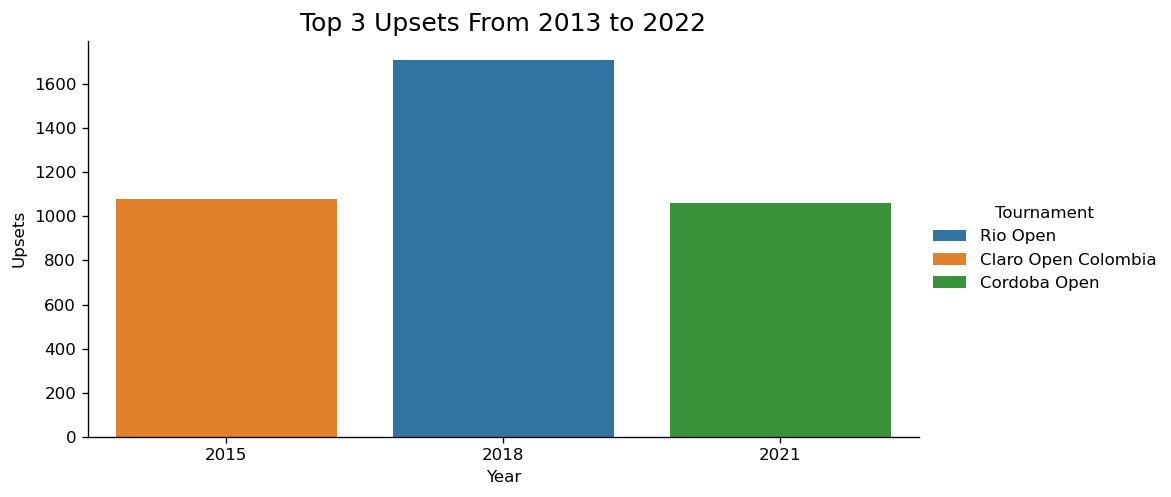

In [34]:
top10upset = biggest_upset[["Tournament","Winner","Loser","WRank","LRank","WPts","LPts","Upsets","Year","Date"]].nlargest(3, "Upsets")
sns.catplot(x="Year", y="Upsets", hue="Tournament", data=top10upset, kind="bar", height=4, aspect=2, dodge=False)
plt.title('Top 3 Upsets From 2013 to 2022', fontsize=15)
plt.show()

### 2.5 Who were the top 10 players at year-end in 2017? How have their rankings changed over the period of 2013 to 2022? 

Rank 7 is not in WRank, but in LRank and with time going towards the end of 2017 their rank actually changed.<br>
So I ploted 10 players with their best rank at the year 2017 end.<br>
To do so I filtered the year to be 2017 with date after 31/10/2017.<br>
Then groupby the filtered data and ge the best rank of each winner. Also reset index. Then ascending the data frame <br>
With finding each players best rank I can actually find 10 people.Rank 14 & Rank 16 players is in my top 10 players.

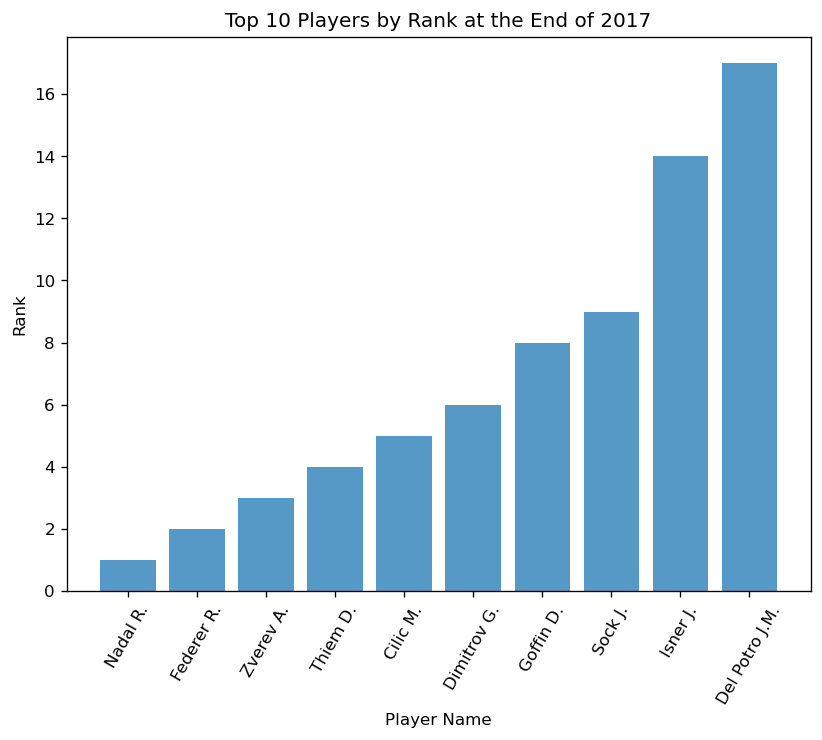

In [35]:
data_2017 = data[data['Year'] == 2017]
end_of_2017 = data_2017[data_2017['Date'] >= '2017-10-31']

grouped = end_of_2017.groupby('Winner')['WRank'].min().reset_index()
sorted_data = grouped.sort_values('WRank').reset_index(drop=True)

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(sorted_data.head(10)['Winner'], sorted_data.head(10)['WRank'], alpha = 0.75)
ax.set_title('Top 10 Players by Rank at the End of 2017')
ax.set_xlabel('Player Name')
ax.set_ylabel('Rank')
plt.xticks(rotation=60)
plt.show()

So I put the 10 players name in a list, and put each year in the list.<br>
Then I loop through each player to get their rank for each year and append the rank  for that player.<br>
If a player does not have data for a particular year, I append None to the list of ranks for that year.<br>

I then do a new loop for figures.Loop through each player again to plot their rank changes over time. <br>
Plot rank on the y-axis and the year on the x-axis, using 2017 as the midpoint.<br>

* Graph make sense to me. For example, Sork J. didn't attend any matches in 2019, only 3 mathes in 2020 maybe due to covid & injury. So the line has a break in 2018 , then apeared again in 2021.

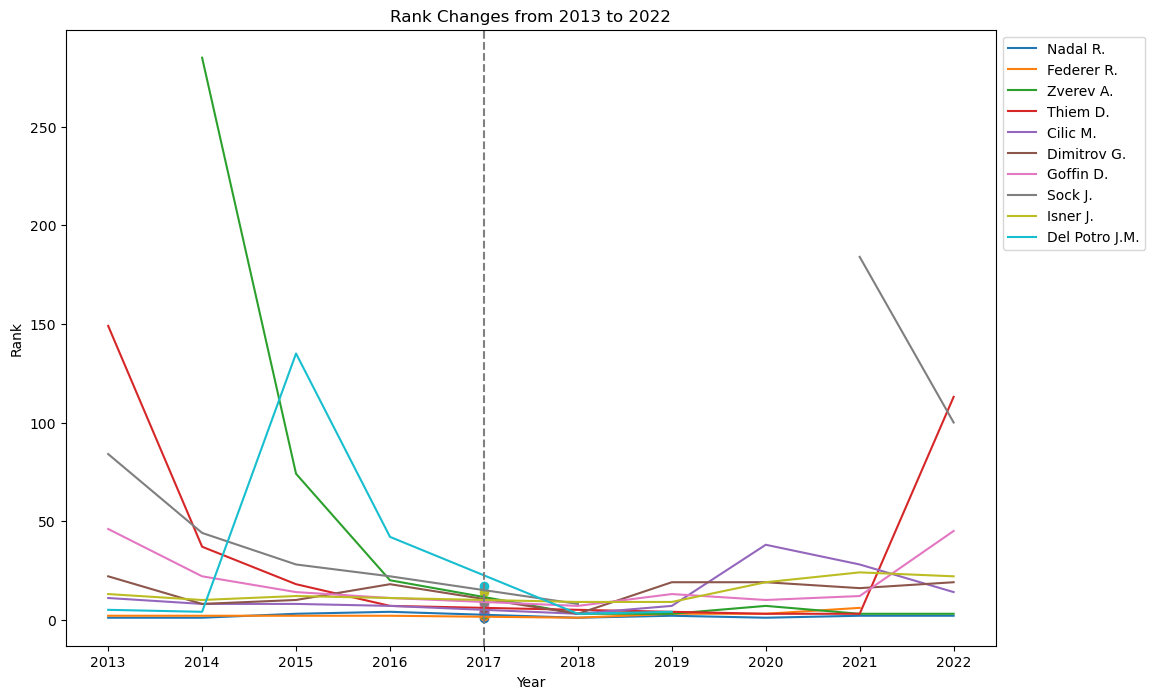

In [36]:
players = ['Nadal R.','Federer R.','Zverev A.','Thiem D.','Cilic M.','Dimitrov G.','Goffin D.','Sock J.','Isner J.','Del Potro J.M.']
years = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
ranks = []

for player in players:
    player_ranks = []
    for year in years:
        rank = data[['WRank','Winner','Year','Date']][(data['Winner'] == player) & (data['Year'] == year)]
        if not rank.empty:
            player_ranks.append(min(rank['WRank']))
        else:
            player_ranks.append(None)
    ranks.append(player_ranks)
    
rcParams['figure.dpi'] = 100
fig, ax = plt.subplots(figsize=(12, 8))
for i, player in enumerate(players):
    x = years[:4] + years[5:]
    y = ranks[i][:4] + ranks[i][5:]
    ax.plot(x, y, color='C'+str(i), label=player) 
    ax.scatter(2017, ranks[i][4])
    
ax.set_title('Rank Changes from 2013 to 2022')
ax.set_xlabel('Year')
ax.set_ylabel('Rank')
ax.set_xticks(years)
ax.axvline(x=2017, linestyle='--', color='grey')
ax.legend(loc='upper left', fontsize=10, bbox_to_anchor=(1, 1), ncol=1)
plt.show()

## Task 3: Advanced analysis questions 

### 3.1 Which tournaments have had on average the most upsets (where a lower-ranked player defeated a higher-ranked player)? List the top 10 and plot their averages.

Compare WRank & LRank，if WRank is bigger than LRank it's True and set the it as 1 if False then 0.<br>
Then I groupby Tournament to find the total number of each tournament.<br>
Also groups by tournament and sums up the number of upsets. Then I can actaully do the percentage calcuation and put it in a data frame.<br>
Once I have the result, I can plot it.

In [37]:
data['Upsets'] = (data['WRank'] > data['LRank']).astype(int)
total_tournaments = data.groupby('Tournament').size()
total_upsets = data.groupby('Tournament')['Upsets'].sum()
percent_upsets = ((total_upsets / total_tournaments) * 100).to_frame()

top_tournaments = percent_upsets[0].sort_values(ascending=False).head(10)
top_tournaments


Tournament
Forte Village Sardegna Open         59.259259
Adelaide International 2            55.555556
German Open Tennis Championships    51.063830
Generali Open                       49.074074
Gazprom Hungarian Open              48.148148
Emilia-Romagna Open                 48.148148
Tel Aviv Open                       48.148148
AEGON Open                          47.872340
Topshelf Open                       47.413793
Cordoba Open                        47.222222
Name: 0, dtype: float64

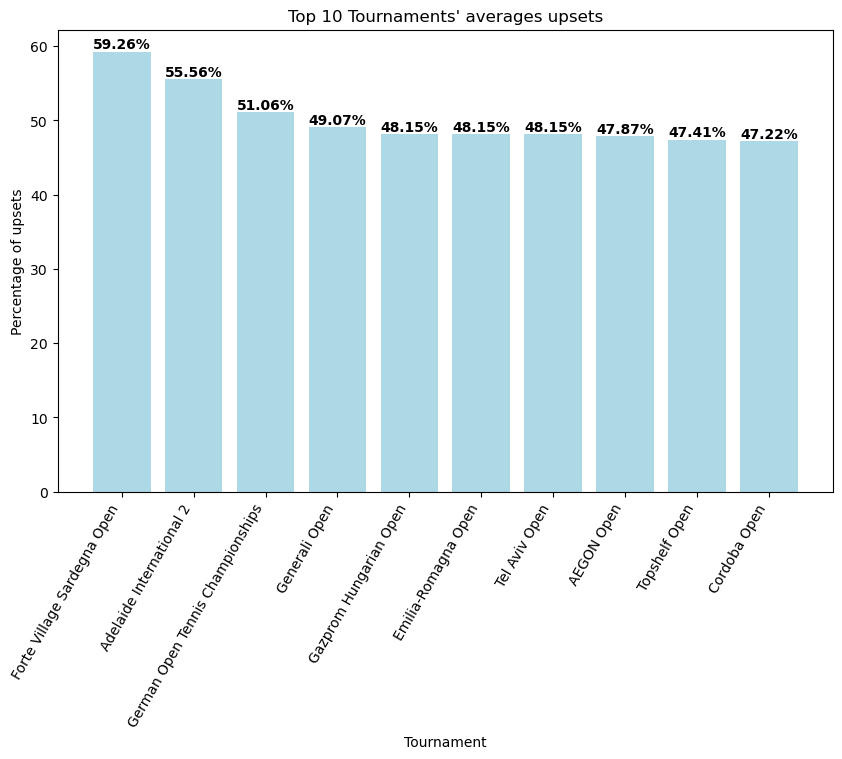

In [38]:
plt.figure(figsize=(10,6))
plt.bar(top_tournaments.index, top_tournaments.values,color = 'lightblue')
plt.xticks(rotation=60, ha='right')
plt.title('Top 10 Tournaments\' averages upsets')
plt.xlabel('Tournament')
plt.ylabel('Percentage of upsets')
for i, v in enumerate(top_tournaments.values):
    plt.text(i, v, f'{v:.2f}%', ha='center', va='bottom', fontweight='bold')
plt.show()


### 3.2 Determine who the top 10 ranked players were at the end of 2022. Then calculate their head-to-head win-loss record against each other for all the matches they played in 2022.

* 3.2.1 Top 10 ranked players were at the end of 2022 - Use the same method from 2.5 task

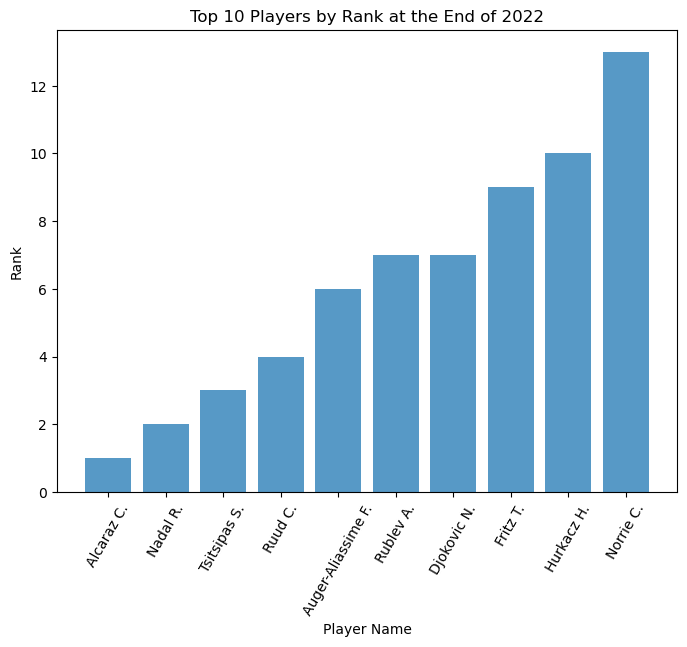

In [39]:
data_2022 = data[data['Year'] == 2022]
end_of_2022 = data_2022[data_2022['Date'] >= '2022-10-31']


grouped = end_of_2022.groupby('Winner')['WRank'].min().reset_index()
sorted_data = grouped.sort_values('WRank').reset_index(drop=True)

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(sorted_data.head(10)['Winner'], sorted_data.head(10)['WRank'], alpha = 0.75)
ax.set_title('Top 10 Players by Rank at the End of 2022')
ax.set_xlabel('Player Name')
ax.set_ylabel('Rank')
plt.xticks(rotation=60)
plt.show()


* 3.2.2 Head-to-head win-loss record <br>
I put the 10 players name in a list, and put each year in the list.<br>
Then I loop through each player against other players games in 2022, keep result in a list<br>
Then I can compare how many games they play against each other and get there head-to-head win.<br>


In [40]:
players = ['Alcaraz C.', 'Nadal R.', 'Tsitsipas S.', 'Ruud C.', 'Auger-Aliassime F.', 'Rublev A.', 'Djokovic N.', 'Fritz T.', 'Hurkacz H.', 'Norrie C.']
matches_2022 = data[['WRank', 'LRank', 'Winner', 'Loser', 'WPts', 'LPts', 'Round']][(data['Year'] == 2022) & ((data['Winner'].isin(players)) | (data['Loser'].isin(players)))]
records = []

# loop through all player pairs and count their wins and losses against each other
for i, player1 in enumerate(players):
    for j, player2 in enumerate(players):
        if i < j:
            matches = matches_2022[((matches_2022['Winner'] == player1) & (matches_2022['Loser'] == player2)) |
                                   ((matches_2022['Winner'] == player2) & (matches_2022['Loser'] == player1))]
            wins_player1 = len(matches[matches['Winner'] == player1])
            wins_player2 = len(matches[matches['Winner'] == player2])
            games_played = wins_player1 + wins_player2
            records.append({
                'Player 1': player1,
                'Player 2': player2,
                'Player 1 Head Win': wins_player1,
                'Player 2 Head Win': wins_player2,
                'Games Played': games_played,
                'Head-to-Head': f'{wins_player1} : {wins_player2}'
            })

head_to_head_df = pd.DataFrame(records).sort_values(['Player 1', 'Player 2'])
head_to_head_df.set_index(['Player 1', 'Player 2'], inplace=True)
head_to_head_df


Player 1 Head Win  Player 2 Head Win  \
Player 1           Player 2                                                   
Alcaraz C.         Auger-Aliassime F.                  0                  1   
                   Djokovic N.                         1                  0   
                   Fritz T.                            0                  0   
                   Hurkacz H.                          1                  0   
                   Nadal R.                            1                  1   
                   Norrie C.                           2                  1   
                   Rublev A.                           0                  0   
                   Ruud C.                             2                  0   
                   Tsitsipas S.                        2                  0   
Auger-Aliassime F. Djokovic N.                         0                  1   
                   Fritz T.                            0                  1   
                   Hurkacz H.                          0                  1   
                   Norrie C.                           2                  1   
                   Rublev A.                           1                  1   
Djokovic N.        Fritz T.                            1                  0   
                   Hurkacz H.                          1                  0   
                   Norrie C.                           1                  0   
Fritz T.           Hurkacz H.                          0                  0   
                   Norrie C.                           0                  0   
Hurkacz H.         Norrie C.                           0                  0   
Nadal R.           Auger-Aliassime F.                  1                  1   
                   Djokovic N.                         1                  0   
                   Fritz T.                            1                  2   
                   Hurkacz H.                          0                  0   
                   Norrie C.                           1                  0   
                   Rublev A.                           0                  0   
                   Ruud C.                             2                  0   
                   Tsitsipas S.                        0                  0   
Rublev A.          Djokovic N.                         1                  1   
                   Fritz T.                            0                  2   
                   Hurkacz H.                          2                  0   
                   Norrie C.                           1                  0   
Ruud C.            Auger-Aliassime F.                  2                  0   
                   Djokovic N.                         0                  2   
                   Fritz T.                            1                  0   
                   Hurkacz H.                          1                  1   
                   Norrie C.                           1                  0   
                   Rublev A.                           1                  0   
Tsitsipas S.       Auger-Aliassime F.                  0                  1   
                   Djokovic N.                         0                  4   
                   Fritz T.                            1                  0   
                   Hurkacz H.                          1                  0   
                   Norrie C.                           0                  1   
                   Rublev A.                           2                  1   
                   Ruud C.                             0                  0   

                                       Games Played Head-to-Head  
Player 1           Player 2                                       
Alcaraz C.         Auger-Aliassime F.             1        0 : 1  
                   Djokovic N.                    1        1 : 0  
                   Fritz T.                       0      

### 3.3 List the top 5 players who had the longest winning streaks between 2013 – 2022. List their names, the lengths of their winning streaks and the year(s) in which they occurred.

As some players may have sever high winning streaks, I decided to show only max streak for each play and find top 5 and show the streak numbers and occurred year.<br>
I first get data from 2013 to 2022 to be sorted by date, then create empty dictionray to hold player name & hold their streak & hold the year it happened.<br>
Then loop though winner row, if the name say Nadal was't in the dirtionary before then append it to the player name & streak turn to +1.<br>
Then find next time when the Nadal appears, if in winner row streak +1 to be 2, if in loser row stop the count and reset streak to 0.<br>
Going through for each player and find their highest streak and get the top 5 of it.

In [41]:
data_years = data[(data['Year'] >= 2013) & (data['Year'] <= 2022)].sort_values('Date')
top_players = {}
player_streaks = {}
player_streak_years = {}

for i, row in data_years.iterrows():
    winner = row['Winner']
    loser = row['Loser']
    year = row['Year']

    # if the winner is not in the list of top players, add them with a streak of 1
    if winner not in top_players:
        top_players[winner] = 0
        player_streaks[winner] = [1] # initialize a list to store all the streaks for this player
        player_streak_years[winner] = [year] # initialize a list to store the years of each streak
    # if the winner is already in the list, add 1 to their current streak and update the streak and year lists
    else:
        current_streak = player_streaks[winner][-1] + 1 # get the current streak by adding 1 to the last streak in the list
        player_streaks[winner].append(current_streak) # add the current streak to the list of streaks for this player
        player_streak_years[winner].append(year) # add the year of the current streak to the list of years for this player

    # check if the winner is also in the loser column
    if loser in top_players:
        player_streaks[loser].append(0) # add a 0 to the list of streaks for the loser
        player_streak_years[loser].append(year) # add the current year to the list of years for the loser
            
    # update the top streak for each player
    for player in top_players:
        player_max_streak = max(player_streaks[player]) # get the highest streak for this player
        if player_max_streak > top_players[player]:
            top_players[player] = player_max_streak

# get the top 5 players with the longest streaks
top_5_players = sorted(top_players.items(), key=lambda x: x[1], reverse=True)[:5]

# create a list of dictionaries for each player with their longest streak and year
top_5_list = []
for player, streak in top_5_players:
    max_streak_index = player_streaks[player].index(streak)
    max_streak_year = player_streak_years[player][max_streak_index]
    top_5_list.append({'Player': player, 'Streak': streak, 'Year': max_streak_year})

df = pd.DataFrame(top_5_list)
df


,Player,Streak,Year
0,Murray A.,29,2017
1,Djokovic N.,28,2015
2,Nadal R.,22,2013
3,Federer R.,17,2018
4,Medvedev D.,16,2021


### 3.4 In tennis, each set is played first to 6, but sometimes it is played to 7. A tiebreak is a set that someone wins 7-6 and is different to someone winning a set 7-5. Tiebreaks are stressful and some players perform better than others in tiebreaks. Count how many tiebreaks each player in the entire dataset has played. Then, calculate the percentage of tiebreaks that each player has won. List the top 10 players according to the percentage of tiebreaks won.

As the dataset is from 2013 to 2022,there are lots of players who only played 1 tiebreak and won. Plot top 10 will be all showing 100%.<br>
I have decided to plot players who played tiebreaks over 10 times and see how much percentage they won and show top 10 players.

In [42]:
data['Wtiebreak'] = ((data['W1'] == 7) & (data['L1'] == 6)) | \
                   ((data['W2'] == 7) & (data['L2'] == 6)) | \
                   ((data['W3'] == 7) & (data['L3'] == 6)) | \
                   ((data['W4'] == 7) & (data['L4'] == 6)) | \
                   ((data['W5'] == 7) & (data['L5'] == 6)) 

data['Ltiebreak'] = ((data['W1'] == 6) & (data['L1'] == 7)) | \
                   ((data['W2'] == 6) & (data['L2'] == 7)) | \
                   ((data['W3'] == 6) & (data['L3'] == 7)) | \
                   ((data['W4'] == 6) & (data['L4'] == 7)) | \
                   ((data['W5'] == 6) & (data['L5'] == 7)) 


data['Tiebreaks'] = data[['Wtiebreak', 'Ltiebreak']].fillna(0).sum(axis=1)
tb_counts = data.groupby(['Winner']).agg({'Tiebreaks': lambda x: x.sum(), 'Wtiebreak': lambda x: x.sum()}).reset_index()
tb_counts['Win Percentage'] = tb_counts['Wtiebreak'] / tb_counts['Tiebreaks']

tb_counts = tb_counts[tb_counts['Tiebreaks'] > 10].sort_values(by='Win Percentage', ascending=False).head(10)
tb_counts['Win Percentage'] = tb_counts['Win Percentage'].apply(lambda x: '{:.2%}'.format(x))

tb_counts


,Winner,Tiebreaks,Wtiebreak,Win Percentage
258,Kuznetsov An.,21,20,95.24%
31,Bautista R.,40,37,92.50%
98,De Schepper K.,11,10,90.91%
472,Tursunov D.,19,17,89.47%
152,Gerasimov E.,19,17,89.47%
354,Olivo R.,17,15,88.24%
70,Cecchinato M.,24,21,87.50%
326,Munar J.,24,21,87.50%
29,Basilashvili N.,56,49,87.50%
506,Young D.,31,27,87.10%


## Task 4: Open questions and analyses 

### 4.1 Nadal R.  changes over years

From the first graph, I can see the winning matches number decresing as he's getting old / more injury<br>
The matches won is lowest in 2020 maybe due to Covid.

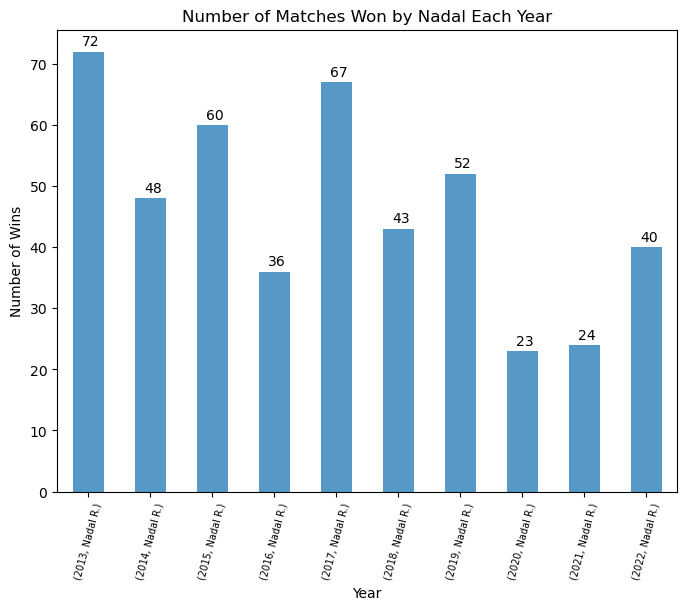

In [74]:
nadal = data[['WRank', 'LRank', 'Winner','Date']][data['Winner'] =='Nadal R.']
nadal['Year'] = nadal['Date'].dt.year
grouped = nadal.groupby('Year')['Winner']
nadal_wins = grouped.value_counts()

fig, ax = plt.subplots(figsize=(8,6))
ax = nadal_wins.plot(kind='bar', rot=75,alpha=0.75)
for i, v in enumerate(nadal_wins):
    ax.text(i-0.1, v+1, str(v))
ax.set_title('Number of Matches Won by Nadal Each Year')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Wins')
plt.xticks(fontsize=7)
plt.show()


From the second graph, I can see in 2016 Nadal's best rank is at 4 associated to the samll numbers of matches won.<br>
Over all I can see the rank has the same trend of the numbers of matches won for Nadal.

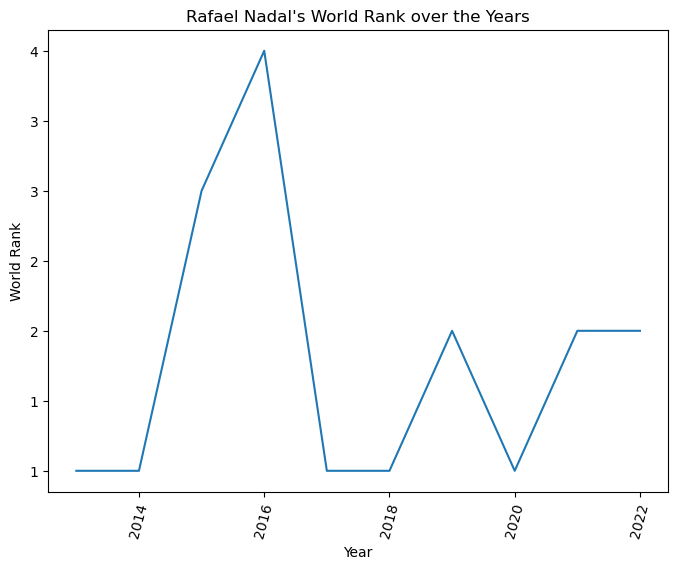

In [44]:
import matplotlib.ticker as ticker

grouped_rank = nadal.groupby('Year')['WRank']
nadal_rank = grouped_rank.min().astype(int)

fig, ax = plt.subplots(figsize=(8,6))
ax = nadal_rank.plot(kind='line', rot=75)
ax.set_title('Rafael Nadal\'s World Rank over the Years')
ax.set_xlabel('Year')
ax.set_ylabel('World Rank')
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d')) 
plt.show()

### 4.2For Masters Cup, how average odds of match losers in different locations and rounds of the Masters Cup tournament looks like

From first graph, I can observe that the average odds of match losers in the Masters Cup tournament vary across locations and rounds.<br>
In location Turin it has lower average odds for the losers compare to location London (Except final round).<br>
There is no obvious outlier as I can see from the graph.

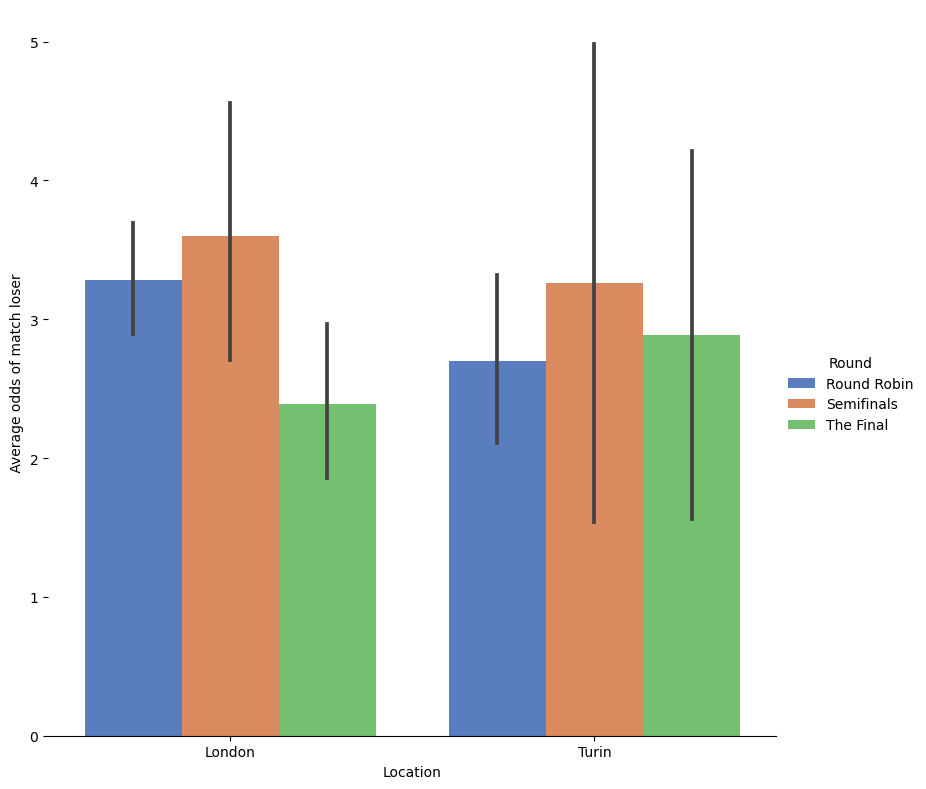

In [45]:
df_new = data[['Series', 'Location', 'Winner','Round','WRank','LRank','AvgW','AvgL','MaxW','MaxL']][data['Series'] =='Masters Cup']
df_new.pivot_table(index=['Location','Round'])
grouped = df_new.groupby(['Location','Round']).mean()
ax = sns.catplot(x="Location", y="AvgL", hue="Round", data=df_new,height=8, kind="bar", palette="muted")
ax.despine(left=True)
ax.set_ylabels(" Average odds of match loser ")
plt.show()

From second graph, I can see the trend of the percentage difference over different locations and rounds<br>
It appears that the percentage difference is generally higher for Turin compared to London.<br>

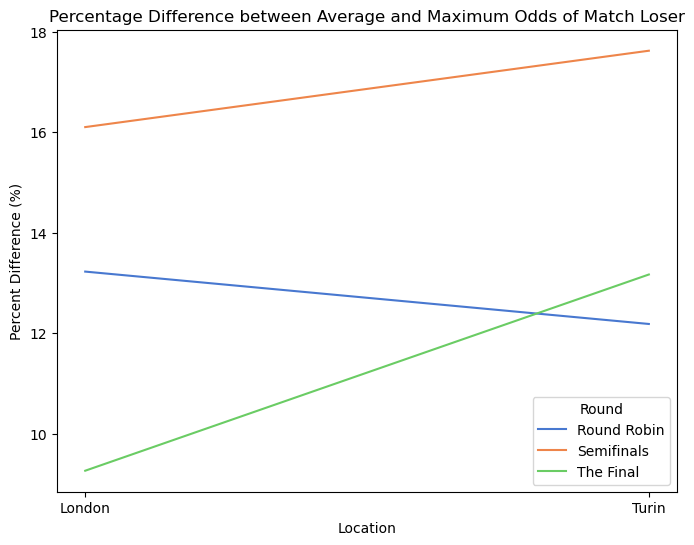

In [47]:
df_new = data[['Series', 'Location', 'Winner','Round','WRank','LRank','AvgW','AvgL','MaxW','MaxL']][data['Series'] =='Masters Cup']
grouped = df_new.groupby(['Location','Round']).mean()
grouped['Percent Difference'] = (grouped['MaxL'] - grouped['AvgL']) / grouped['AvgL'] * 100

fig, ax = plt.subplots(figsize=(8,6))
ax = sns.lineplot(x="Location", y="Percent Difference", hue="Round", data=grouped, palette="muted")
ax.set_title('Percentage Difference between Average and Maximum Odds of Match Loser')
ax.set_xlabel('Location')
ax.set_ylabel('Percent Difference (%)')
plt.show()


## 4.3 For Masters 1000, how the location and surface combinations that may have affect of  maximum odds for the match winners.

From the first graph I can the maximum odds of match winners for different locations and rounds in the Masters 1000 series.<br>
I can see there are a few outliers in location Monte Carlo,Rome,Shanghai.<br>
New York is the location has lower maximum odds, and from my previous EDA I know New York is in the top 3 cities helds the tournament.<br>
So maybe the New York has a higher level of competitiveness compared to other locations.

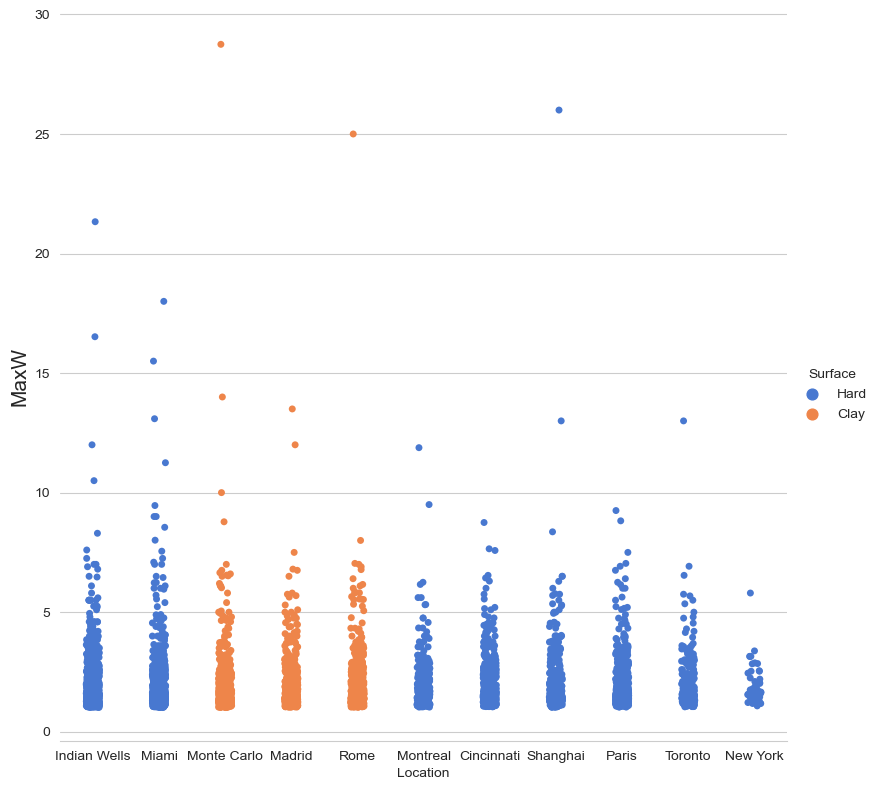

In [79]:
df_new = data[['Series', 'Location', 'Winner','Round','WRank','LRank','AvgW','AvgL','MaxW','MaxL','Surface']][data['Series'] =='Masters 1000']
df_new.pivot_table(index=['Location','Surface'])
grouped = df_new.groupby(['Location','Surface']).mean()
ax = sns.catplot(x="Location", y="MaxW", hue="Surface", data=df_new,height=8, kind="strip", palette="muted")
ax.despine(left=True)
ax.set_ylabels("MaxW",fontsize=15)
plt.show()

From second graph, I can see that the maximum odds of match winner tend to be higher on hard surfaces compared to clay surfaces, only New York and Paris are opposite.<br>
This may indicate that players who are more proficient on hard surfaces tend to have an advantage in these tournaments. 

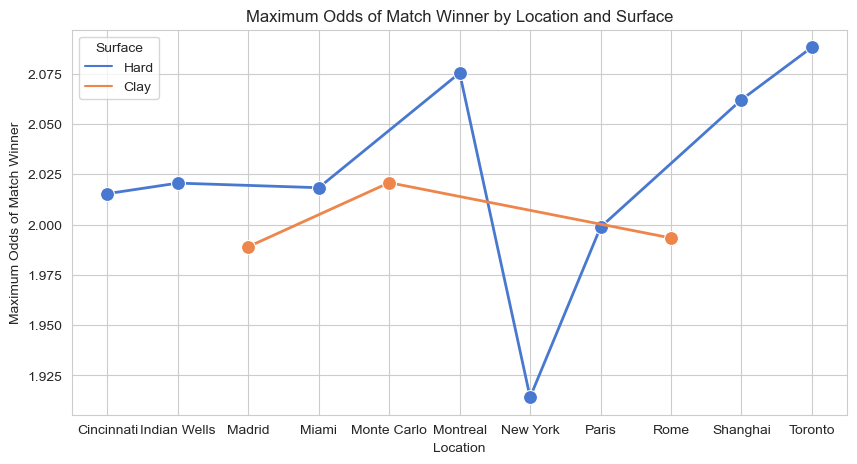

In [77]:
df_new = data[['Series', 'Location', 'Winner', 'Round', 'WRank', 'LRank', 'AvgW', 'AvgL', 'MaxW', 'MaxL', 'Surface']][data['Series'] =='Masters 1000']
grouped = df_new.groupby(['Location', 'Surface']).mean().reset_index()

sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=grouped, x='Location', y='MaxW', hue='Surface', ax=ax, marker='o', markersize=10, linewidth=2, palette='muted')
ax.set_title('Maximum Odds of Match Winner by Location and Surface')
ax.set_xlabel('Location')
ax.set_ylabel('Maximum Odds of Match Winner')
plt.show()


From third graph, we can see that Nadal is the top winner on clay, Federer is the top winner on Clay, and Djokovic is the top winner on hard courts.<br> 
It also shows that there is a significant difference in the number of wins between the top 3 winners on each surface.

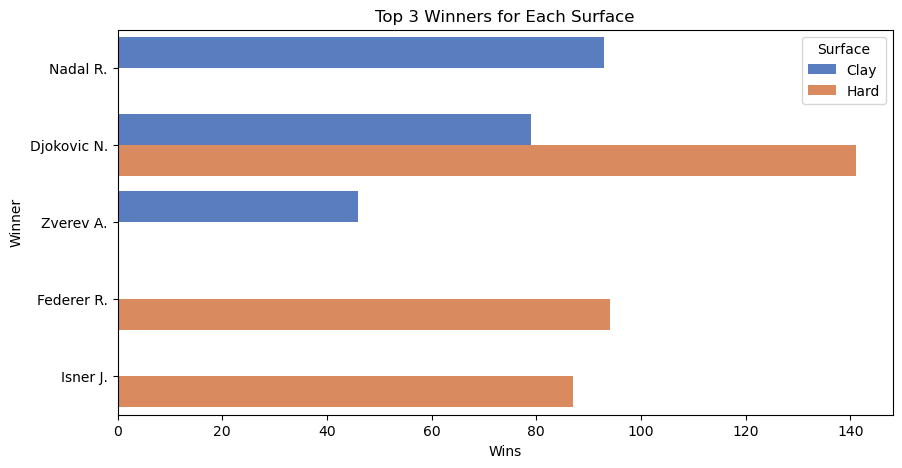

In [76]:
df_new = data[['Series', 'Location', 'Winner', 'Round', 'WRank', 'LRank', 'AvgW', 'AvgL', 'MaxW', 'MaxL', 'Surface']][data['Series'] =='Masters 1000']
grouped = df_new.groupby(['Surface', 'Winner']).size().reset_index(name='Wins')
top_3 = grouped.groupby('Surface').apply(lambda x: x.nlargest(3, 'Wins')).reset_index(drop=True)

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=top_3, x='Wins', y='Winner', hue='Surface', palette='muted')
plt.xlabel('Wins')
plt.ylabel('Winner')
plt.title('Top 3 Winners for Each Surface')
plt.show()


## APPENDIX
Dataset Variables (as per Tennis-Data dataset Notes):
ATP = Tournament number (men)

Location = Venue of tournament

Tournament = Name of tournament (including sponsor if relevant)

Data = Date of match (note: prior to 2003 the date shown for all matches played in a single tournament is the start date)

Series = Name of ATP tennis series (Grand Slam, Masters, International or International Gold)

Court = Type of court (outdoors or indoors)

Surface = Type of surface (clay, hard, carpet or grass)

Round = Round of match

Best of = Maximum number of sets playable in match

Winner = Match winner

Loser = Match loser

WRank = ATP Entry ranking of the match winner as of the start of the tournament

LRank = ATP Entry ranking of the match loser as of the start of the tournament

WPts = ATP Entry points of the match winner as of the start of the tournament

LPts = ATP Entry points of the match loser as of the start of the tournament

W1 = Number of games won in 1st set by match winner

L1 = Number of games won in 1st set by match loser

W2 = Number of games won in 2nd set by match winner

L2 = Number of games won in 2nd set by match loser

W3 = Number of games won in 3rd set by match winner

L3 = Number of games won in 3rd set by match loser

W4 = Number of games won in 4th set by match winner

L4 = Number of games won in 4th set by match loser

W5 = Number of games won in 5th set by match winner

L5 = Number of games won in 5th set by match loser

Wsets = Number of sets won by match winner

Lsets = Number of sets won by match loser

Comment = Comment on the match (Completed, Retired, Awarded, or Walkover)

Key to match betting odds data:
B365W = Bet365 odds of match winner

B365L = Bet365 odds of match loser

B&WW = Bet&Win odds of match winner

B&WL = Bet&Win odds of match loser

CBW = Centrebet odds of match winner

CBL = Centrebet odds of match loser

EXW = Expekt odds of match winner

EXL = Expekt odds of match loser

LBW = Ladbrokes odds of match winner

LBL = Ladbrokes odds of match loser

GBW = Gamebookers odds of match winner

GBL = Gamebookers odds of match loser

IWW = Interwetten odds of match winner

IWL = Interwetten odds of match loser

PSW = Pinnacles Sports odds of match winner

PSL = Pinnacles Sports odds of match loser

SBW = Sportingbet odds of match winner

SBL = Sportingbet odds of match loser

SJW = Stan James odds of match winner

SJL = Stan James odds of match loser

UBW = Unibet odds of match winner

UBL = Unibet odds of match loser

MaxW= Maximum odds of match winner (as shown by Oddsportal.com)

MaxL= Maximum odds of match loser (as shown by Oddsportal.com)

AvgW= Average odds of match winner (as shown by Oddsportal.com)

AvgL= Average odds of match loser (as shown by Oddsportal.com)

Note: Tennis-Data utilised the following sources for compiling the ATP Tennis-Data's results. According to their website, the following sources were used.